In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

###Função

In [ ]:
import sklearn
from ipywidgets import interact
from scipy import stats
import os
import scipy
           
def PlotPerfis(data, logs, label_color,label_fac,fac_class=None, prop_fac=False):
    
    '''
    Função para visualizar perfis de um poço.

    data: pandas dataframe com colunas obrigatórias 'MD' (ou 'PROF' ou 'DEPTH' ou 'TVD' ou 'TVDSS') e 'FACIES'
    logs: lista de perfis a serem plotados
        ex - logs = ['GR','VEL']
    label_color: dicionário de cores
        chaves devem ser os codigos das facies
        valores devem ser a cor correspondente como string (nome da cor, ou codigo hexadecimal)
            ex - label_color = {1:'yellow',2:'lightgreen', 3:'green', 4:'red'}
    label_fac: dicionario dos nomes das facies
        chaves devem ser os codigos das facies
        valores devem ser o nome correspondentes
            ex - label_color = {1:'MUITO POROSO',2:'POROSO',3:'FECH',4:'ARGILOSO'}
    fac_class: nome da coluna de facies classificada (se houver)
        Se fac_class não for fornecido, esse track não será exibido
    prop_fac: booleano. Controla se será desenhado a proporção (ou probabilidade de fácies
        True: desenha track de proporção (ou probabilidade) de fácies. 
            As proporções (ou probabilidades) de fácies devem corresponder a colunas com nome igual ao nome da cada facies
            Assume-se que a soma das proporções (ou probabilidades) deve ser igual a 1
        False: não desenha esse track
    '''
    
    possible_prof_labels = ['MD', 'PROF', 'DEPTH', 'TVD', 'TVDSS']
    for name in possible_prof_labels:
        if np.isin(name, list(data.columns)):
            prof_label = name
            break
    
    n = 1
    
    if fac_class is not None:
        n+=1
        
    if prop_fac:
        n+=1
    
    prof = data[prof_label]
    prof_lims = (max(prof),min(prof))

    fig, ax = plt.subplots(1,len(logs)+n,figsize=(15,8))

    # plotando perfil de fácies
    for f in np.unique(data.FACIES):
        x=np.zeros_like(prof)
        ax[0].fill_betweenx(prof, x, data.FACIES, where=data.FACIES==f, color = label_color[f])
        ax[0].set_xlim(0,1)
        ax[0].set_ylim(*prof_lims)
        ax[0].set_title('Facies', fontsize=12)
        ax[0].set_xticklabels([])

    # plotando os outros perfis

    for j, p in enumerate(logs):
        ax[j+1].plot(data[p], prof)
        ax[j+1].set_title(p, fontsize=12)
        ax[j+1].set_ylim(*prof_lims)
        if max(data[p]) < 1:
            ax[j+1].set_xlim(0,1)
        ax[j+1].grid()
        ax[j+1].set_yticklabels([])
    
    if prop_fac:
        x1=np.zeros_like(prof)
        for k, v in label_fac.items():
            ax[-2].fill_betweenx(prof, x1, x1+data[v], color = label_color[k])
            x1+=data[v]
        ax[-2].set_xlim(0,1)
        ax[-2].set_ylim(*prof_lims)
        ax[-2].set_xticklabels([])
        ax[-2].set_yticklabels([])
        ax[-2].set_title('Probabilidade de Facies', fontsize=12)
    
    if fac_class is not None:
        for f in np.unique(data.FACIES):
            x=np.zeros_like(prof)
            ax[-1].fill_betweenx(prof, x, data[fac_class], where=data[fac_class]==f, color = label_color[f])
            ax[-1].set_xlim(0,1)
            ax[-1].set_ylim(*prof_lims)
            ax[-1].set_title('Facies Classificadas', fontsize=12)
            ax[-1].set_xticklabels([])
            ax[-1].set_yticklabels([])

    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Análise da classificação usando Naive Bayes**

In [ ]:
df = pd.read_csv('/content/poço_faceis.csv',
                    sep=',', encoding='utf-8')

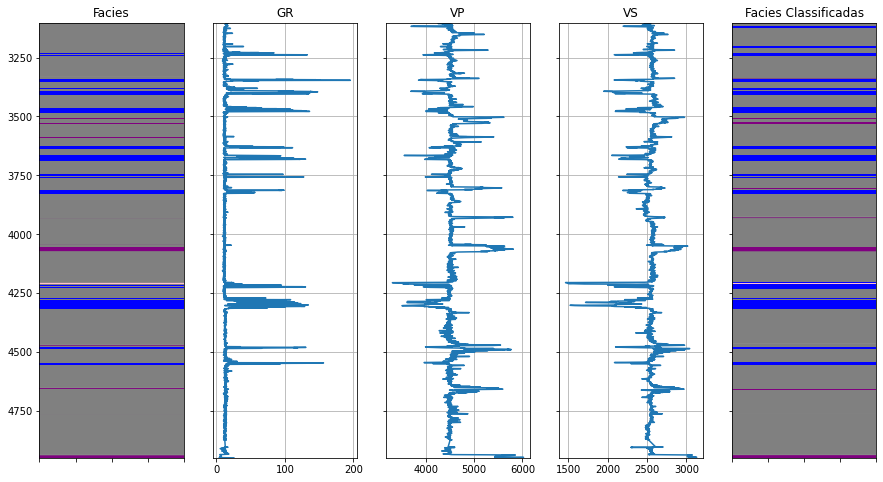

In [ ]:
poco = df[df.POCO == 'poco_1']

fac_dict={85:'Halita',82:'Anidrita',87:'Carnalita',81:'Taquidrita'}
cor_dict={85:'grey',82:'purple',87:'blue',81:'pink'} 

logs = ['GR','VP','VS', ]

PlotPerfis(poco, logs, cor_dict, fac_dict, fac_class='FACIES_NB')

In [ ]:
accuracy_score(df.FACIES, df.FACIES_NB)

0.9425424741739947

In [ ]:
confusion_matrix(df.FACIES, df.FACIES_NB)

array([[  351,     0,    27,    42],
       [    0,  1396,   255,    19],
       [   53,   294, 19055,   354],
       [  100,     9,   193,  1278]])

In [ ]:
df.FACIES.value_counts().sort_index()

81.0      420
82.0     1670
85.0    19756
87.0     1580
Name: FACIES, dtype: int64

In [ ]:
df.FACIES_NB.value_counts().sort_index()

81.0      504
82.0     1699
85.0    19530
87.0     1693
Name: FACIES_NB, dtype: int64

In [ ]:
print(classification_report(df.FACIES, df.FACIES_NB))

              precision    recall  f1-score   support

        81.0       0.70      0.84      0.76       420
        82.0       0.82      0.84      0.83      1670
        85.0       0.98      0.96      0.97     19756
        87.0       0.75      0.81      0.78      1580

    accuracy                           0.94     23426
   macro avg       0.81      0.86      0.83     23426
weighted avg       0.94      0.94      0.94     23426



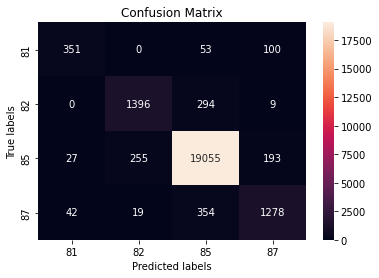

In [ ]:
cm = confusion_matrix(df.FACIES_NB, df.FACIES)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['81', '82','85','87']); ax.yaxis.set_ticklabels(['81', '82','85','87']);
fig.savefig('confusion_nb.png', dpi=fig.dpi)

#**Análise da classificação usando SVM**




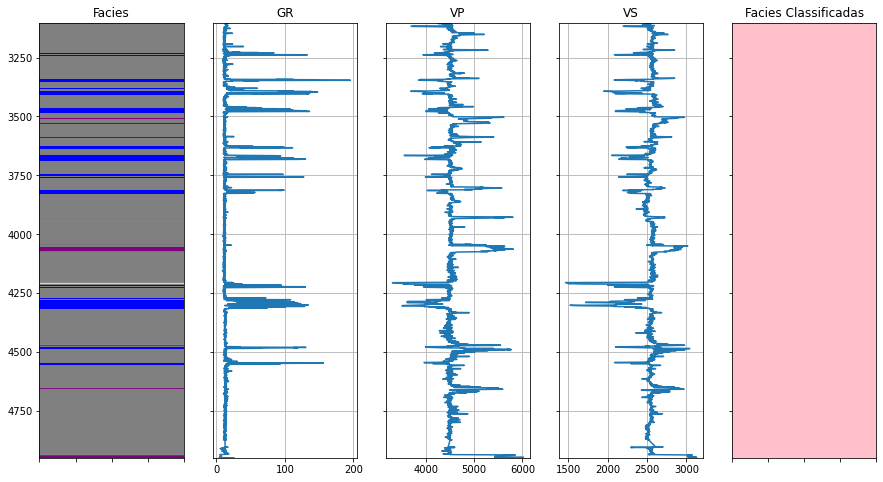

In [ ]:
poco = df[df.POCO == 'poco_1']

fac_dict={85:'Halita',82:'Anidrita',87:'Carnalita',81:'Taquidrita'}
cor_dict={85:'grey',82:'purple',87:'blue',81:'pink'} 

logs = ['GR','VP','VS', ]

PlotPerfis(poco, logs, cor_dict, fac_dict, fac_class='FACIES_SVM')

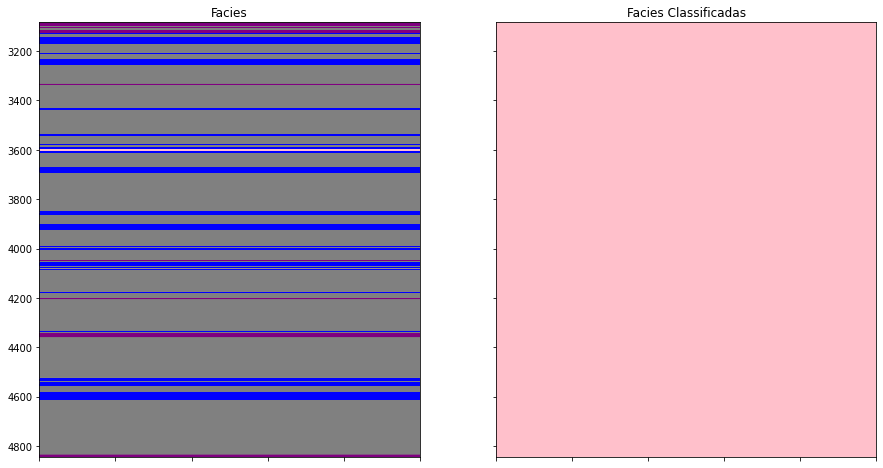

In [ ]:
poco = df[df.POCO == 'poco_2']
logs = [ ]

PlotPerfis(poco, logs, cor_dict, fac_dict, fac_class='FACIES_SVM')

In [ ]:
accuracy_score(df.FACIES, df.FACIES_SVM)

0.01792879706309229

In [ ]:
confusion_matrix(df.FACIES, df.FACIES_SVM)

array([[  420,     0,     0,     0],
       [ 1670,     0,     0,     0],
       [19756,     0,     0,     0],
       [ 1580,     0,     0,     0]])

In [ ]:
df.FACIES.value_counts().sort_index()

81.0      420
82.0     1670
85.0    19756
87.0     1580
Name: FACIES, dtype: int64

In [ ]:
df.FACIES_SVM.value_counts().sort_index()

81.0    23426
Name: FACIES_SVM, dtype: int64

In [ ]:
print(classification_report(df.FACIES, df.FACIES_SVM))

              precision    recall  f1-score   support

        81.0       0.02      1.00      0.04       420
        82.0       0.00      0.00      0.00      1670
        85.0       0.00      0.00      0.00     19756
        87.0       0.00      0.00      0.00      1580

    accuracy                           0.02     23426
   macro avg       0.00      0.25      0.01     23426
weighted avg       0.00      0.02      0.00     23426



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  420     0     0     0]
 [ 1670     0     0     0]
 [19756     0     0     0]
 [ 1580     0     0     0]]


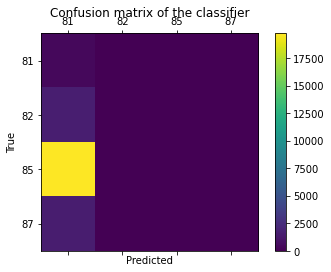

In [ ]:
labels = ['81', '82','85','87']
cm = confusion_matrix(df.FACIES, df.FACIES_SVM)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

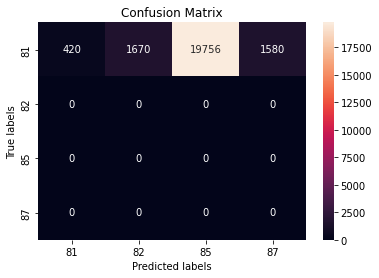

In [ ]:
cm = confusion_matrix(df.FACIES_SVM, df.FACIES)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['81', '82','85','87']); ax.yaxis.set_ticklabels(['81', '82','85','87']);
fig.savefig('confusion_nb.png', dpi=fig.dpi)

#**Análise da classificação usando RL**



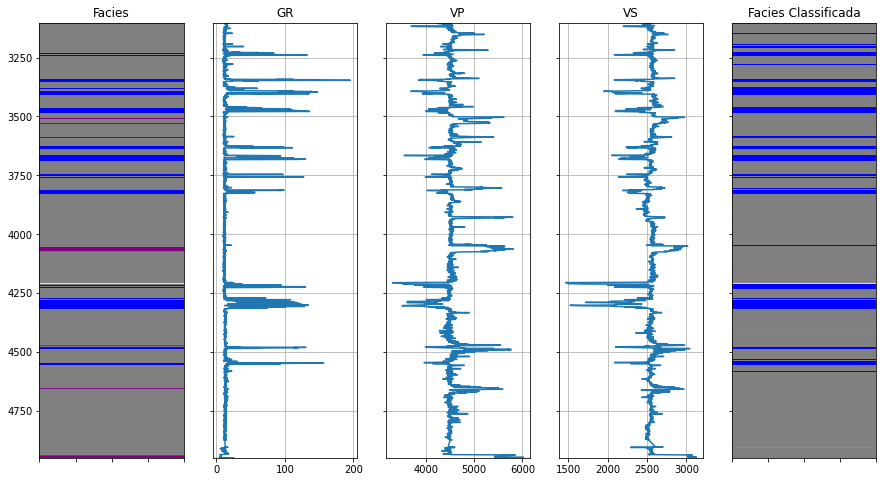

In [ ]:
poco = df[df.POCO == 'poco_1']


fac_dict={85:'Halita',82:'Anidrita',87:'Carnalita',81:'Taquidrita'}
cor_dict={85:'grey',82:'purple',87:'blue',81:'pink'} 

logs = ['GR','VP','VS', ]

PlotPerfis(poco, logs, cor_dict, fac_dict, fac_class='FACIES_RL')

In [ ]:
accuracy_score(df.FACIES, df.FACIES_RL)

0.8843165713309997

In [ ]:
confusion_matrix(df.FACIES, df.FACIES_RL)

array([[  349,     0,    18,    53],
       [  110,     0,  1519,    41],
       [  219,     0, 19044,   493],
       [  144,     0,   113,  1323]])

In [ ]:
df.FACIES.value_counts().sort_index()

81.0      420
82.0     1670
85.0    19756
87.0     1580
Name: FACIES, dtype: int64

In [ ]:
df.FACIES_RL.value_counts().sort_index()

81.0      822
85.0    20694
87.0     1910
Name: FACIES_RL, dtype: int64

In [ ]:
print(classification_report(df.FACIES, df.FACIES_RL))

              precision    recall  f1-score   support

        81.0       0.42      0.83      0.56       420
        82.0       0.00      0.00      0.00      1670
        85.0       0.92      0.96      0.94     19756
        87.0       0.69      0.84      0.76      1580

    accuracy                           0.88     23426
   macro avg       0.51      0.66      0.57     23426
weighted avg       0.83      0.88      0.86     23426



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  349     0    18    53]
 [  110     0  1519    41]
 [  219     0 19044   493]
 [  144     0   113  1323]]


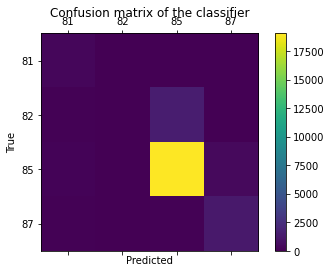

In [ ]:
labels = ['81', '82','85','87']
cm = confusion_matrix(df.FACIES, df.FACIES_RL)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

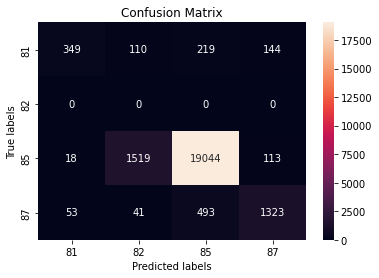

In [ ]:
cm = confusion_matrix(df.FACIES_RL, df.FACIES)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['81', '82','85','87']); ax.yaxis.set_ticklabels(['81', '82','85','87']);


#**Análise da classificação usando KNN**




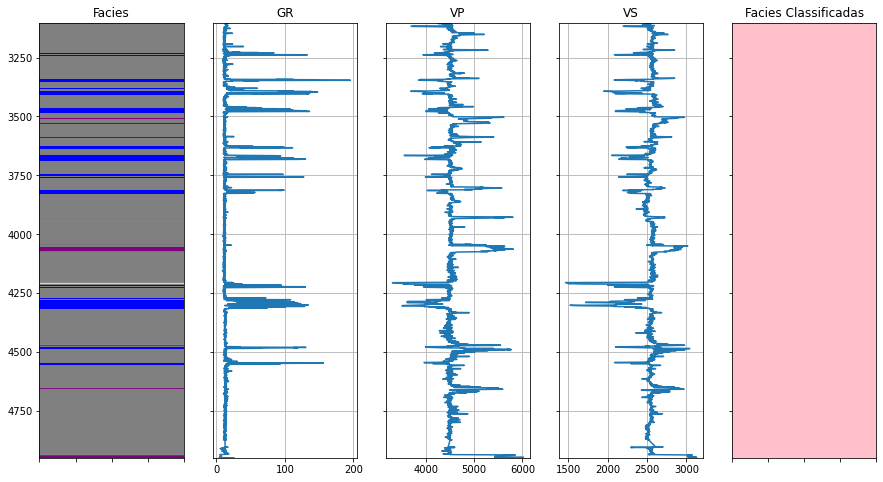

In [ ]:
poco = df[df.POCO == 'poco_1']


fac_dict={85:'Halita',82:'Anidrita',87:'Carnalita',81:'Taquidrita'}
cor_dict={85:'grey',82:'purple',87:'blue',81:'pink'} 

logs = ['GR','VP','VS', ]

PlotPerfis(poco, logs, cor_dict, fac_dict, fac_class='FACIES_KNN')

In [ ]:
accuracy_score(df.FACIES, df.FACIES_KNN)

0.01792879706309229

In [ ]:
confusion_matrix(df.FACIES, df.FACIES_KNN)

array([[  420,     0,     0,     0],
       [ 1670,     0,     0,     0],
       [19756,     0,     0,     0],
       [ 1580,     0,     0,     0]])

In [ ]:
df.FACIES.value_counts().sort_index()

81.0      420
82.0     1670
85.0    19756
87.0     1580
Name: FACIES, dtype: int64

In [ ]:
df.FACIES_KNN.value_counts().sort_index()

81.0    23426
Name: FACIES_KNN, dtype: int64

In [ ]:
print(classification_report(df.FACIES, df.FACIES_KNN))

              precision    recall  f1-score   support

        81.0       0.02      1.00      0.04       420
        82.0       0.00      0.00      0.00      1670
        85.0       0.00      0.00      0.00     19756
        87.0       0.00      0.00      0.00      1580

    accuracy                           0.02     23426
   macro avg       0.00      0.25      0.01     23426
weighted avg       0.00      0.02      0.00     23426



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  420     0     0     0]
 [ 1670     0     0     0]
 [19756     0     0     0]
 [ 1580     0     0     0]]


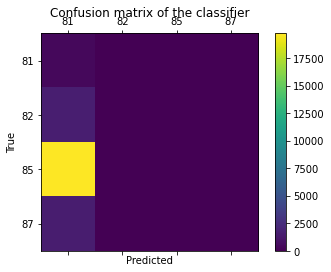

In [ ]:
labels = ['81', '82','85','87']
cm = confusion_matrix(df.FACIES, df.FACIES_KNN)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

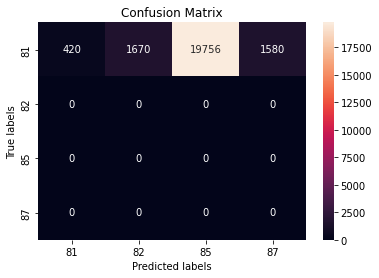

In [ ]:
cm = confusion_matrix(df.FACIES_KNN, df.FACIES)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['81', '82','85','87']); ax.yaxis.set_ticklabels(['81', '82','85','87']);


#**Análise da classificação usando Ávore de Decisões**







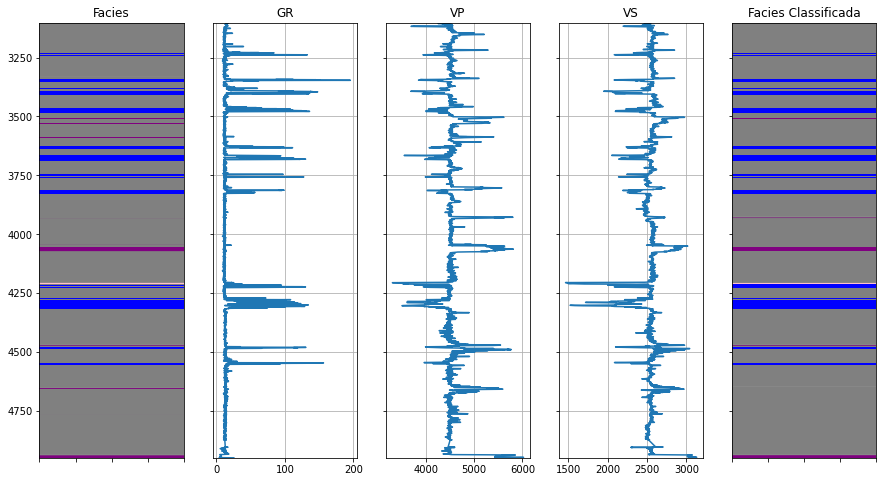

In [ ]:
poco = df[df.POCO == 'poco_1']


fac_dict={85:'Halita',82:'Anidrita',87:'Carnalita',81:'Taquidrita'}
cor_dict={85:'grey',82:'purple',87:'blue',81:'pink'} 

logs = ['GR','VP','VS', ]

PlotPerfis(poco, logs, cor_dict, fac_dict, fac_class='FACIES_TREE')

In [ ]:
accuracy_score(df.FACIES, df.FACIES_TREE)

0.9495432425510117

In [ ]:
confusion_matrix(df.FACIES, df.FACIES_TREE)

array([[  318,     0,    56,    46],
       [    0,  1306,   364,     0],
       [   36,   112, 19389,   219],
       [   52,     9,   288,  1231]])

In [ ]:
df.FACIES.value_counts().sort_index()

81.0      420
82.0     1670
85.0    19756
87.0     1580
Name: FACIES, dtype: int64

In [ ]:
df.FACIES_TREE.value_counts().sort_index()

81.0      406
82.0     1427
85.0    20097
87.0     1496
Name: FACIES_TREE, dtype: int64

In [ ]:
print(classification_report(df.FACIES, df.FACIES_TREE))

              precision    recall  f1-score   support

        81.0       0.78      0.76      0.77       420
        82.0       0.92      0.78      0.84      1670
        85.0       0.96      0.98      0.97     19756
        87.0       0.82      0.78      0.80      1580

    accuracy                           0.95     23426
   macro avg       0.87      0.82      0.85     23426
weighted avg       0.95      0.95      0.95     23426



[[  318     0    56    46]
 [    0  1306   364     0]
 [   36   112 19389   219]
 [   52     9   288  1231]]


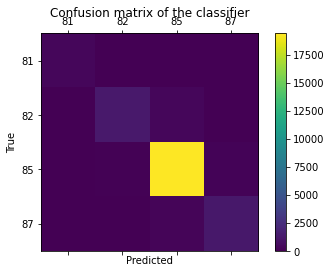

In [ ]:
labels = ['81', '82','85','87']
cm = confusion_matrix(df.FACIES, df.FACIES_TREE)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

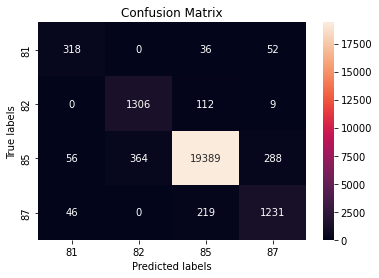

In [ ]:
cm = confusion_matrix(df.FACIES_TREE, df.FACIES)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['81', '82','85','87']); ax.yaxis.set_ticklabels(['81', '82','85','87']);


#**Análise da classificação usando Random Forest**




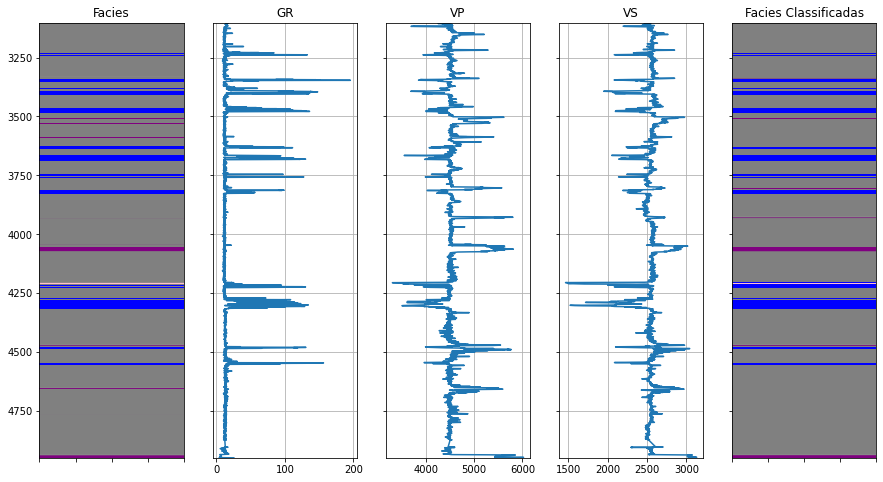

In [ ]:
poco = df[df.POCO == 'poco_1']


fac_dict={85:'Halita',82:'Anidrita',87:'Carnalita',81:'Taquidrita'}
cor_dict={85:'grey',82:'purple',87:'blue',81:'pink'} 

logs = ['GR','VP','VS', ]

PlotPerfis(poco, logs, cor_dict, fac_dict, fac_class='FACIES_FOREST')

In [ ]:
accuracy_score(df.FACIES, df.FACIES_FOREST)

0.9496713053871766

In [ ]:
confusion_matrix(df.FACIES, df.FACIES_FOREST)

array([[  317,     0,    30,    73],
       [    0,  1301,   368,     1],
       [   36,   141, 19363,   216],
       [   44,     9,   261,  1266]])

In [ ]:
df.FACIES.value_counts().sort_index()

81.0      420
82.0     1670
85.0    19756
87.0     1580
Name: FACIES, dtype: int64

In [ ]:
df.FACIES_FOREST.value_counts().sort_index()

81.0      397
82.0     1451
85.0    20022
87.0     1556
Name: FACIES_FOREST, dtype: int64

In [ ]:
print(classification_report(df.FACIES, df.FACIES_FOREST))

              precision    recall  f1-score   support

        81.0       0.80      0.75      0.78       420
        82.0       0.90      0.78      0.83      1670
        85.0       0.97      0.98      0.97     19756
        87.0       0.81      0.80      0.81      1580

    accuracy                           0.95     23426
   macro avg       0.87      0.83      0.85     23426
weighted avg       0.95      0.95      0.95     23426



[[  317     0    30    73]
 [    0  1301   368     1]
 [   36   141 19363   216]
 [   44     9   261  1266]]


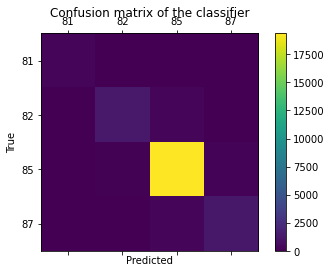

In [ ]:
labels = ['81', '82','85','87']
cm = confusion_matrix(df.FACIES, df.FACIES_FOREST)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

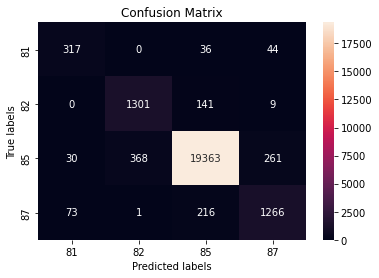

In [ ]:
cm = confusion_matrix(df.FACIES_FOREST, df.FACIES)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['81', '82','85','87']); ax.yaxis.set_ticklabels(['81', '82','85','87']);


#**Análise da classificação usando XGBOOST**




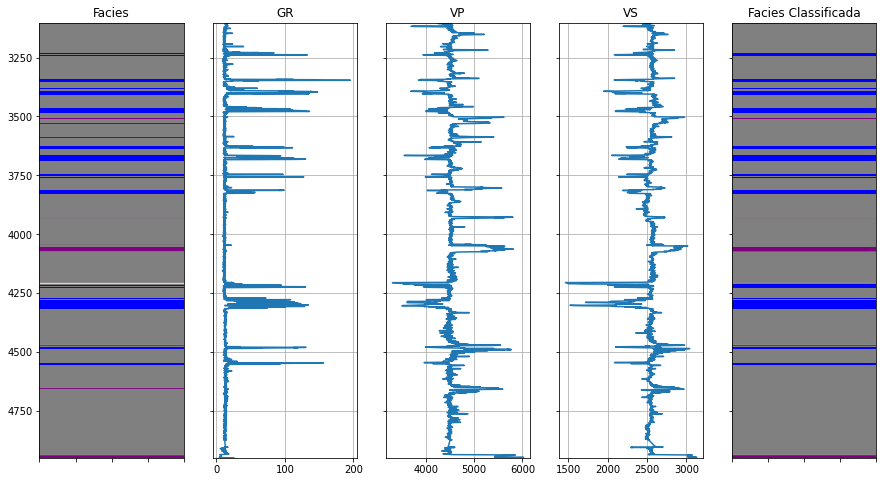

In [ ]:
poco = df[df.POCO == 'poco_1']


fac_dict={85:'Halita',82:'Anidrita',87:'Carnalita',81:'Taquidrita'}
cor_dict={85:'grey',82:'purple',87:'blue',81:'pink'} 

logs = ['GR','VP','VS', ]

PlotPerfis(poco, logs, cor_dict, fac_dict, fac_class='FACIES_XG')

In [ ]:
accuracy_score(df.FACIES, df.FACIES_XG)

0.9582515154102279

In [ ]:
confusion_matrix(df.FACIES, df.FACIES_XG)

array([[  339,     0,    39,    42],
       [    0,  1395,   275,     0],
       [   22,   110, 19414,   210],
       [   35,    11,   234,  1300]])

In [ ]:
df.FACIES.value_counts().sort_index()

81.0      420
82.0     1670
85.0    19756
87.0     1580
Name: FACIES, dtype: int64

In [ ]:
df.FACIES_XG.value_counts().sort_index()

81.0      396
82.0     1516
85.0    19962
87.0     1552
Name: FACIES_XG, dtype: int64

In [ ]:
print(classification_report(df.FACIES, df.FACIES_XG))

              precision    recall  f1-score   support

        81.0       0.86      0.81      0.83       420
        82.0       0.92      0.84      0.88      1670
        85.0       0.97      0.98      0.98     19756
        87.0       0.84      0.82      0.83      1580

    accuracy                           0.96     23426
   macro avg       0.90      0.86      0.88     23426
weighted avg       0.96      0.96      0.96     23426



[[  339     0    39    42]
 [    0  1395   275     0]
 [   22   110 19414   210]
 [   35    11   234  1300]]


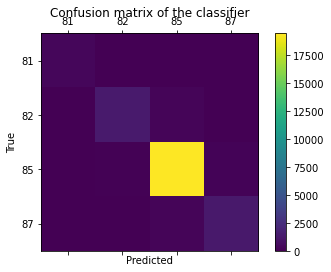

In [ ]:
labels = ['81', '82','85','87']
cm = confusion_matrix(df.FACIES, df.FACIES_XG)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

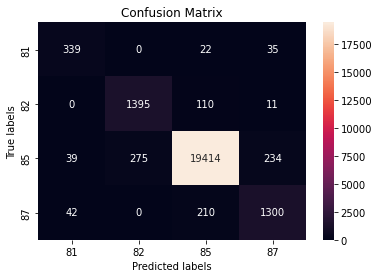

In [ ]:
cm = confusion_matrix(df.FACIES_XG, df.FACIES)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['81', '82','85','87']); ax.yaxis.set_ticklabels(['81', '82','85','87']);


#**Análise da classificação usando LightGBM**











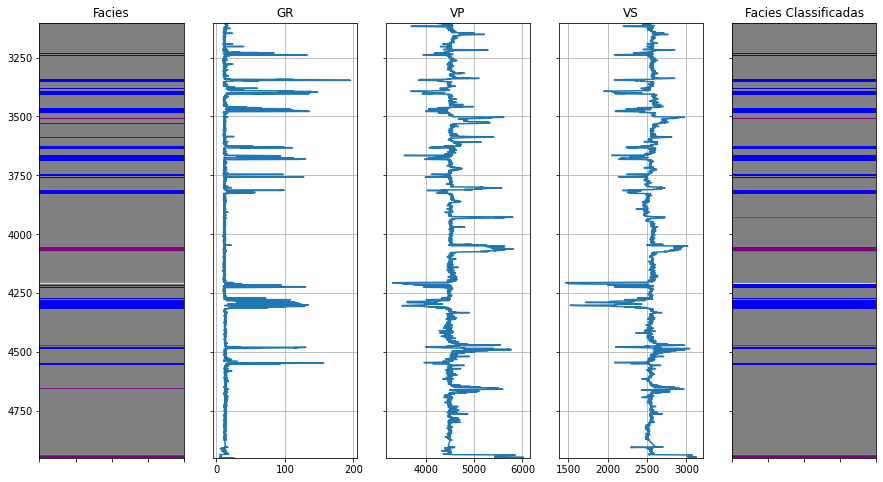

In [ ]:
poco = df[df.POCO == 'poco_1']


fac_dict={85:'Halita',82:'Anidrita',87:'Carnalita',81:'Taquidrita'}
cor_dict={85:'grey',82:'purple',87:'blue',81:'pink'} 

logs = ['GR','VP','VS', ]

PlotPerfis(poco, logs, cor_dict, fac_dict, fac_class='FACIES_LGBM')

In [ ]:
accuracy_score(df.FACIES, df.FACIES_LGBM)

0.9522325621104756

In [ ]:
confusion_matrix(df.FACIES, df.FACIES_LGBM)

array([[  333,     1,    39,    47],
       [    1,  1350,   318,     1],
       [   38,   129, 19359,   230],
       [   61,    10,   244,  1265]])

In [ ]:
df.FACIES.value_counts().sort_index()

81.0      420
82.0     1670
85.0    19756
87.0     1580
Name: FACIES, dtype: int64

In [ ]:
df.FACIES_LGBM.value_counts().sort_index()

81.0      433
82.0     1490
85.0    19960
87.0     1543
Name: FACIES_LGBM, dtype: int64

In [ ]:
print(classification_report(df.FACIES, df.FACIES_LGBM))

              precision    recall  f1-score   support

        81.0       0.77      0.79      0.78       420
        82.0       0.91      0.81      0.85      1670
        85.0       0.97      0.98      0.97     19756
        87.0       0.82      0.80      0.81      1580

    accuracy                           0.95     23426
   macro avg       0.87      0.85      0.86     23426
weighted avg       0.95      0.95      0.95     23426



[[  333     1    39    47]
 [    1  1350   318     1]
 [   38   129 19359   230]
 [   61    10   244  1265]]


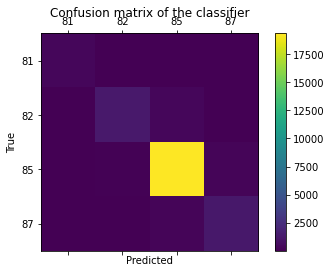

In [ ]:
labels = ['81', '82','85','87']
cm = confusion_matrix(df.FACIES, df.FACIES_LGBM)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

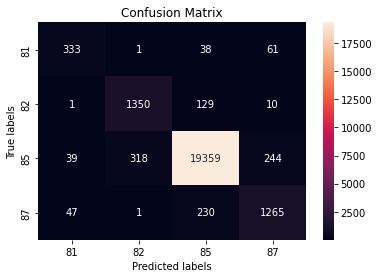

In [ ]:
cm = confusion_matrix(df.FACIES_LGBM, df.FACIES)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['81', '82','85','87']); ax.yaxis.set_ticklabels(['81', '82','85','87']);


#**Análise da classificação usando CATBOOST**











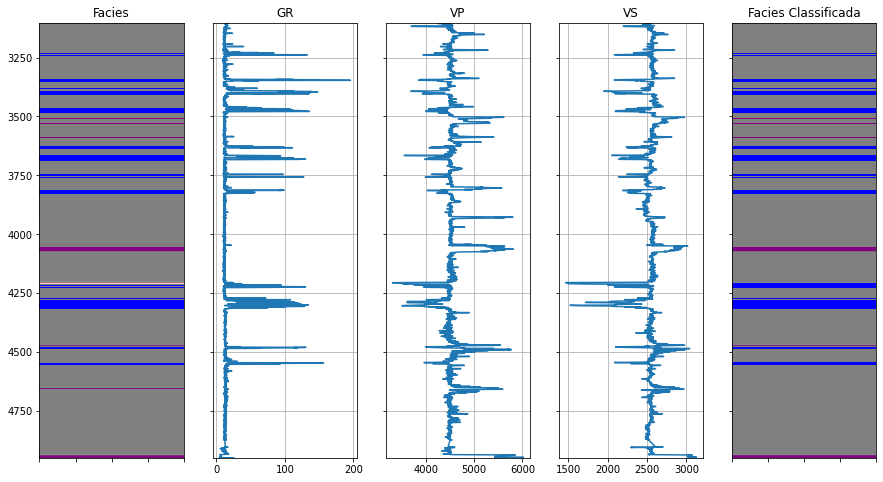

In [ ]:
poco = df[df.POCO == 'poco_1']


fac_dict={85:'Halita',82:'Anidrita',87:'Carnalita',81:'Taquidrita'}
cor_dict={85:'grey',82:'purple',87:'blue',81:'pink'} 

logs = ['GR','VP','VS', ]

PlotPerfis(poco, logs, cor_dict, fac_dict, fac_class='FACIES_CAT')

In [ ]:
accuracy_score(df.FACIES, df.FACIES_CAT)

0.9569708870485785

In [ ]:
confusion_matrix(df.FACIES, df.FACIES_CAT)

array([[  341,     3,    32,    44],
       [    1,  1399,   268,     2],
       [   34,   127, 19397,   198],
       [   45,    10,   244,  1281]])

In [ ]:
df.FACIES.value_counts().sort_index()

81.0      420
82.0     1670
85.0    19756
87.0     1580
Name: FACIES, dtype: int64

In [ ]:
df.FACIES_CAT.value_counts().sort_index()

81.0      421
82.0     1539
85.0    19941
87.0     1525
Name: FACIES_CAT, dtype: int64

In [ ]:
print(classification_report(df.FACIES, df.FACIES_CAT))

              precision    recall  f1-score   support

        81.0       0.81      0.81      0.81       420
        82.0       0.91      0.84      0.87      1670
        85.0       0.97      0.98      0.98     19756
        87.0       0.84      0.81      0.83      1580

    accuracy                           0.96     23426
   macro avg       0.88      0.86      0.87     23426
weighted avg       0.96      0.96      0.96     23426



[[  341     3    32    44]
 [    1  1399   268     2]
 [   34   127 19397   198]
 [   45    10   244  1281]]


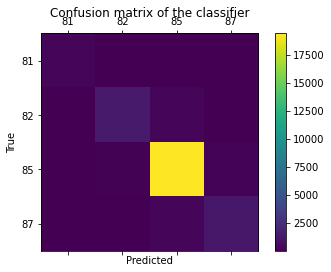

In [ ]:
labels = ['81', '82','85','87']
cm = confusion_matrix(df.FACIES, df.FACIES_CAT)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

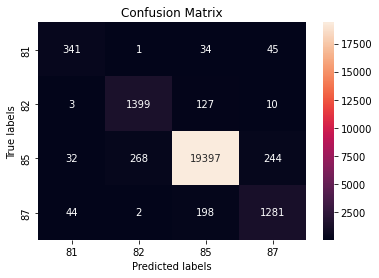

In [ ]:
cm = confusion_matrix(df.FACIES_CAT, df.FACIES)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['81', '82','85','87']); ax.yaxis.set_ticklabels(['81', '82','85','87']);
